In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [71]:
heat_df1 = pd.read_csv("./data/폭염/S-DoT_NATURE_2022.05.02-05.08.csv", encoding="euc-kr")
heat_df2 = pd.read_csv("./data/폭염/S-DoT_NATURE_2022.05.09-05.15.csv", encoding="euc-kr")
heat_df3 = pd.read_csv("./data/폭염/S-DoT_NATURE_2022.05.16-05.22.csv", encoding="euc-kr")
heat_df4 = pd.read_csv("./data/폭염/S-DoT_NATURE_2022.05.23-05.29.csv", encoding="euc-kr")
heat_df5 = pd.read_csv("./data/폭염/S-DoT_NATURE_2022.05.30-06.05.csv", encoding="euc-kr")
heat_df6 = pd.read_csv("./data/폭염/S-DoT_NATURE_2022.06.06-06.12.csv", encoding="euc-kr")
heat_df7 = pd.read_csv("./data/폭염/S-DoT_NATURE_2022.06.13-06.19.csv", encoding="euc-kr")
heat_df8 = pd.read_csv("./data/폭염/S-DoT_NATURE_2022.06.20-06.26.csv", encoding="euc-kr")
heat_df9 = pd.read_csv("./data/폭염/S-DoT_NATURE_2022.06.27-07.03.csv", encoding="euc-kr")
heat_df10 = pd.read_csv("./data/폭염/S-DoT_NATURE_2022.07.04-07.10.csv", encoding="euc-kr")
heat_df11 = pd.read_csv("./data/폭염/S-DoT_NATURE_2022.07.11-07.17.csv", encoding="euc-kr")
heat_df12 = pd.read_csv("./data/폭염/S-DoT_NATURE_2022.07.18-07.24.csv", encoding="euc-kr")
heat_df13 = pd.read_csv("./data/폭염/S-DoT_NATURE_2022.07.25-07.31.csv", encoding="euc-kr")
heat_df14 = pd.read_csv("./data/폭염/S-DoT_NATURE_2022.08.01-08.07.csv", encoding="euc-kr")
heat_df15 = pd.read_csv("./data/폭염/S-DoT_NATURE_2022.08.08-08.14.csv", encoding="euc-kr")
heat_df16 = pd.read_csv("./data/폭염/S-DoT_NATURE_2022.08.15-08.21.csv", encoding="euc-kr")
heat_df17 = pd.read_csv("./data/폭염/S-DoT_NATURE_2022.08.22-08.28.csv", encoding="euc-kr")
heat_df18 = pd.read_csv("./data/폭염/S-DoT_NATURE_2022.08.29-09.04.csv", encoding="euc-kr")
heat_df19 = pd.read_csv("./data/폭염/S-DoT_NATURE_2022.09.05-09.11.csv", encoding="euc-kr")
heat_df20 = pd.read_csv("./data/폭염/S-DoT_NATURE_2022.09.12-09.18.csv", encoding="euc-kr")
heat_df21 = pd.read_csv("./data/폭염/S-DoT_NATURE_2022.09.19-09.25.csv", encoding="euc-kr")
heat_df22 = pd.read_csv("./data/폭염/S-DoT_NATURE_2022.09.26-10.02.csv", encoding="euc-kr")

heat_df = pd.concat([heat_df1, heat_df2, heat_df3, heat_df4, heat_df5, heat_df6, heat_df7, heat_df8, heat_df9, heat_df10, heat_df11, heat_df12, heat_df13, heat_df14, heat_df15, heat_df16, heat_df17, heat_df18, heat_df19, heat_df20, heat_df21, heat_df22], ignore_index=True)

heat_df.columns = heat_df.columns.str.strip()

# 서울시 데이터만 필터링
heat_df = heat_df[heat_df['기관 명'] == '서울시']

# 필요한 컬럼만 추출
use_cols = ['기관 명', '등록일자', '기온(℃)']

heat_df = heat_df[use_cols]

# 컬럼명 영어로 변경
heat_df.columns = ['agency', 'datetime', 'temp']

heat_df

,agency,datetime,temp
0,서울시,2022-05-02 0:07,13.4
1,서울시,2022-05-02 0:07,NaN
2,서울시,2022-05-02 0:07,11.1
3,서울시,2022-05-02 0:07,12.1
4,서울시,2022-05-02 0:07,-40.0
...,...,...,...
3297925,서울시,2022-10-02 23:07,18.3
3297926,서울시,2022-10-02 23:07,19.5
3297927,서울시,2022-10-02 23:07,19.3
3297928,서울시,2022-10-02 23:07,18.7


In [72]:
heat_df['datetime'] = pd.to_datetime(heat_df['datetime'])

# 일시->날짜로 컬럼 추가
heat_df['date'] = heat_df['datetime'].dt.date

# 일별 최고기온 계산
daily_max = heat_df.groupby('date')['temp'].max().reset_index()

# heat_df = daily_max[daily_max['temp'] >= 33] # 폭염일 기준 온도 33도 이상
heat_df = daily_max
heat_df.head()

,date,temp
0,2022-05-02,25.7
1,2022-05-03,27.0
2,2022-05-04,31.1
3,2022-05-05,31.9
4,2022-05-06,31.4


In [73]:
# 미세먼지 데이터
dust_df = pd.read_csv("./data/미세먼지/서울시 대기질 자료 제공_2022.csv", encoding="euc-kr")
dust_df.columns = dust_df.columns.str.strip()

 # 구 단위로 되어 있는거 빼고 평균만 잡겠슴다
dust_df = dust_df[dust_df['구분'] == '평균']

dust_df['일시'] = pd.to_datetime(dust_df['일시'])
dust_df['date'] = dust_df['일시'].dt.floor('D')
dust_df['date'] = dust_df['일시'].dt.date
dust_df = (
    dust_df
    .groupby('date')[['미세먼지(PM10)', '초미세먼지(PM2.5)']]
    .mean()
    .reset_index()
)
dust_df.columns = ['date', 'pm10', 'pm25']
dust_df

,date,pm10,pm25
0,2022-01-01,27.250000,14.708333
1,2022-01-02,34.750000,23.333333
2,2022-01-03,25.291667,14.791667
3,2022-01-04,33.833333,19.541667
4,2022-01-05,47.833333,29.375000
...,...,...,...
360,2022-12-27,49.208333,36.541667
361,2022-12-28,34.500000,21.250000
362,2022-12-29,30.291667,18.375000
363,2022-12-30,38.416667,27.625000


In [74]:
# 폭염 미세먼지 데이터 병합
heat_dust = pd.merge(
    heat_df,
    dust_df
)
heat_dust

,date,temp,pm10,pm25
0,2022-05-02,25.7,44.541667,19.958333
1,2022-05-03,27.0,35.625000,19.541667
2,2022-05-04,31.1,37.541667,19.166667
3,2022-05-05,31.9,32.708333,16.625000
4,2022-05-06,31.4,35.708333,19.166667
...,...,...,...,...
146,2022-09-28,33.5,29.708333,17.000000
147,2022-09-29,35.4,57.958333,42.041667
148,2022-09-30,35.9,49.041667,34.791667
149,2022-10-01,36.3,52.208333,37.375000


In [75]:
heat_dust.isnull().sum()

date    0
temp    0
pm10    0
pm25    0
dtype: int64

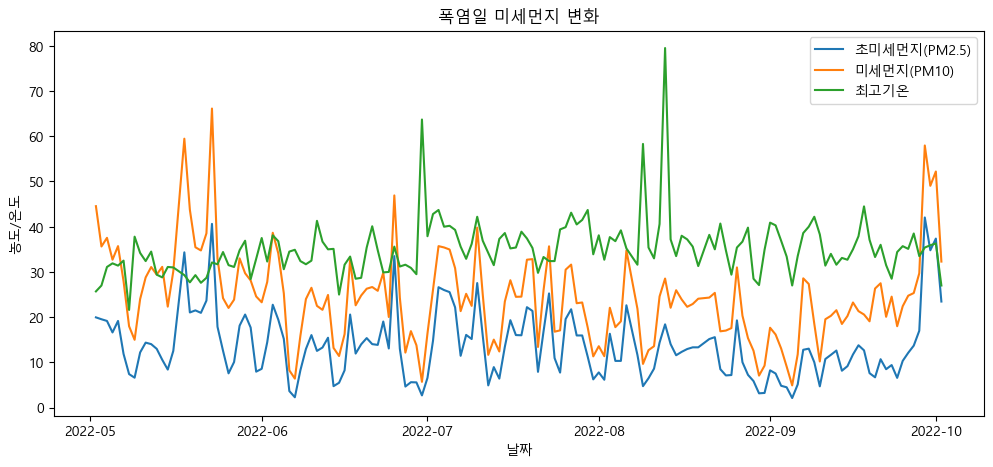

In [76]:
heat_dust = heat_dust.sort_values('date')

plot_df = heat_dust.dropna(subset=['pm25', 'pm10', 'temp'])
plt.figure(figsize=(12,5))
plt.plot(plot_df['date'], plot_df['pm25'], label='초미세먼지(PM2.5)')
plt.plot(plot_df['date'], plot_df['pm10'], label='미세먼지(PM10)')
plt.plot(plot_df['date'], plot_df['temp'], label='최고기온')
plt.title('폭염일 미세먼지 변화')
plt.xlabel('날짜')
plt.ylabel('농도/온도')
plt.legend()
plt.show()